In [63]:
import pandas as pd
df = pd.read_csv("exploit_hacking_set Data Scientist.csv", converters={"type":str, "label":str, "sub_label":str,"text":str, "title":str, "site":str})

In [64]:
df.dtypes

type            object
label           object
sub_label       object
text            object
title           object
site            object
spont_score    float64
dtype: object

In [65]:
df

,type,label,sub_label,text,title,site,spont_score
0,post,Hacking,None,i haven t seen a post about this rat lately . ...,spynote v android rat,forum_sinisterly,60.869565
1,post,Fraud,None,looking for us partner simple extra money add ...,looking for us partner simple extra money,forum_alphabay,-30.434783
2,post,Fraud,Carding,i have drop address in us eu for who need for ...,for who needs drop address in us eu,forum_alphabay,-108.695652
3,post,None,None,have a closed prefix on the thread names after...,suggestions,forum_sinisterly,-26.086957
4,post,Computer,Coding,hey guys . i was working on an updated mass tw...,php leaks / downloads,forum_leakforums,-4.347826
...,...,...,...,...,...,...,...
10330,,,,,,,NaN
10331,,,,,,,NaN
10332,,,,,,,NaN
10333,,,,,,,NaN


### Type
categorical feature

post       8968
product    1140
reply       134
             93
Name: type, dtype: int64

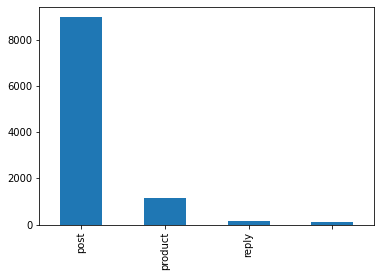

In [66]:
value_counts = df['type'].value_counts()
value_counts .plot.bar()
value_counts

### Labels
categorical target

In [67]:
df['label'].unique().tolist()

['Hacking',
 'Fraud',
 'None',
 'Computer',
 '',
 'Ransomware',
 'Drugs',
 'Gaming',
 'Adult',
 'Manga',
 'Scam',
 'Ddos',
 'Weapons',
 'Insider',
 'Counterfeits']

hacking: 1745 total: 10335


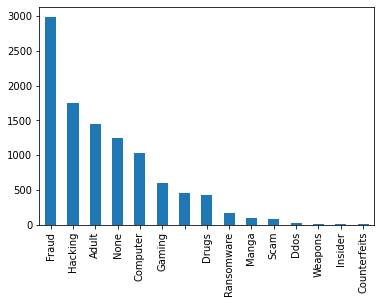

In [68]:
value_counts = df['label'].value_counts()
value_counts.plot.bar()
print("hacking:", value_counts["Hacking"],"total:",len(df))

 Our goal to classify 'Hacking' class against others.
 From this perspective dataset looks <b>imbalanced</b>.
 Also there are some classes that semantically are very close to our target: Fraud, Computer, Ransomware, Scam, Ddos

### Sub_label
categorical target

In [69]:
df['sub_label'].unique().tolist()

['None',
 'Carding',
 'Coding',
 'Exploit',
 'Graphics',
 '',
 'Cocaine',
 'Payments',
 'Documents',
 'Av',
 'Cannabis',
 'Steroids',
 'Paraphernalia']

exploit: 754 total: 10335


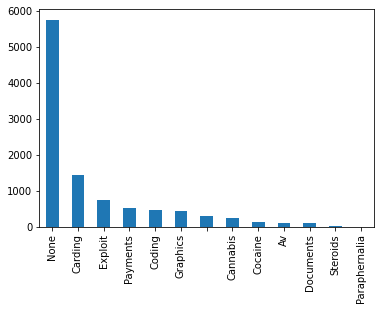

In [70]:
value_counts = df['sub_label'].value_counts()
value_counts.plot.bar()
print("exploit:", value_counts["Exploit"],"total:",len(df))

Our goal to classify ‘Exploit’ class against others.
From this perspective dataset looks either imbalanced.

#### Let's check if there are another labels that also has the "Exploit" sub_label.

label         sub_label    
Adult         None             1444
Fraud         Carding          1438
None          None             1214
Hacking       None              991
Fraud         None              923
Hacking       Exploit           754
Gaming        None              603
Fraud         Payments          522
Computer      Coding            472
              Graphics          448
              None              360
Drugs         Cannabis          249
Ransomware                      167
Drugs         Cocaine           147
Computer      Av                112
Fraud         Documents         101
                                 97
Manga         None               96
Scam          None               87
None                             35
Drugs         Steroids           24
Ddos          None               17
Weapons       None               13
Drugs         None                7
Ddos                              7
Insider                           4
Drugs         Paraphernalia       2


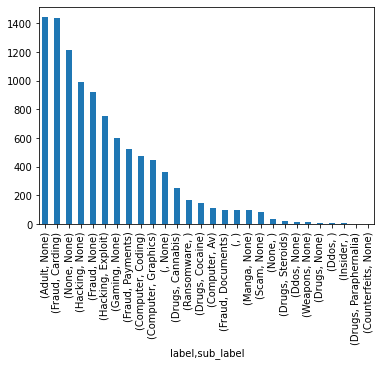

In [71]:
value_counts = df.value_counts(['label','sub_label'])
value_counts.plot.bar()
# print("(Hacking,Exploit):", value_counts["(Hacking, Exploit)"],"total:",len(df))
value_counts

Luckily there's no such labels

### Text
text feature

without text: 88 total: 10335


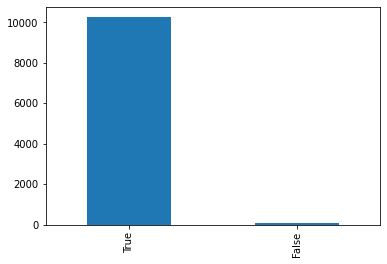

In [72]:
# check how many broken records we have
value_counts = df['text'].apply(lambda x: len(x.strip())>0).value_counts()
value_counts.plot.bar()
print("without text:", value_counts[False],"total:",len(df))

'n_longer_2000: 569'

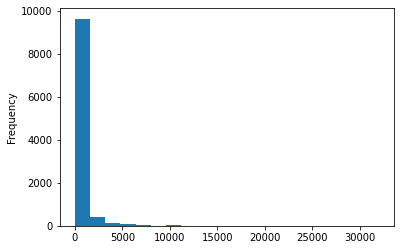

In [73]:
# we have rather small amount of very long sequences
value_counts = df['text'].apply(lambda x: len(x.strip()))
value_counts.plot.hist(bins=20, )
f"n_longer_2000: {len(value_counts[value_counts > 2000])}"

### Title
text feature

without title: 91 total: 10335


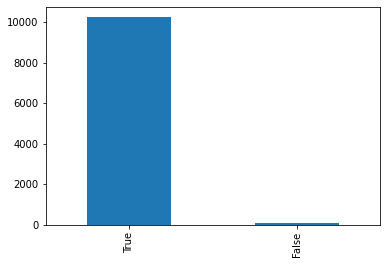

In [74]:
value_counts = df['title'].apply(lambda x: len(x.strip())>0).value_counts()
value_counts.plot.bar()
print("without title:", value_counts[False],"total:",len(df))

'n_longer_300: 7'

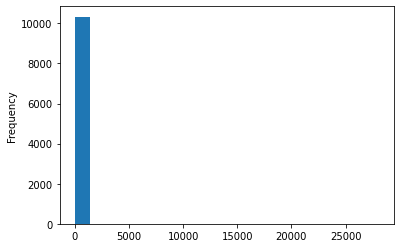

In [75]:
value_counts = df['title'].apply(lambda x: len(x.strip()))
value_counts.plot.hist(bins=20)
f"n_longer_300: {len(value_counts[value_counts > 300])}"


### Spont_score
spont_score could be considered either as <b>numerical feature</b> or as <b>categorical</b> because it has a small number of different values

num different: 46


 60.869565     271
-17.391304     271
-117.391304    250
-21.739130     247
 52.173913     239
-121.739130    239
 8.695652      237
 43.478261     233
-95.652174     231
-56.521739     230
 47.826087     230
-39.130435     228
-73.913043     228
-130.434783    227
 21.739130     227
-34.782609     225
-82.608696     225
-104.347826    224
-43.478261     223
 30.434783     223
 0.000000      222
-47.826087     222
-26.086957     221
 26.086957     221
 65.217391     221
-13.043478     221
-78.260870     220
 56.521739     220
-100.000000    220
-126.086956    219
-8.695652      219
 13.043478     219
 17.391304     218
-108.695652    218
-91.304348     216
-69.565217     216
-113.043478    213
-65.217391     210
-4.347826      205
-30.434783     205
 39.130435     204
 34.782609     204
 4.347826      202
-86.956522     196
-60.869565     194
-52.173913     194
Name: spont_score, dtype: int64

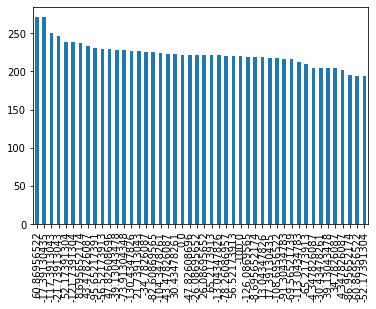

In [76]:
value_counts = df['spont_score'].value_counts()
value_counts.plot.bar()
print("num different:",len(value_counts))
value_counts
